<a href="https://colab.research.google.com/github/BryanPP97/bioinformatics/blob/master/Visualizacion_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Carga de librerías

In [ ]:
install.packages('tidyverse')
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 2. Carga de datos

In [ ]:
df <- read_csv(file = "/content/-100.csv")
spec(df)
class(df)
head(df)

Rows: 248 Columns: 101
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): gene
dbl (100): AE78_S41, AE39_S2, AF09_S71, AE57_S20, AF38_S100, AE56_S19, AF26_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  gene = col_character(),
  AE78_S41 = col_double(),
  AE39_S2 = col_double(),
  AF09_S71 = col_double(),
  AE57_S20 = col_double(),
  AF38_S100 = col_double(),
  AE56_S19 = col_double(),
  AF26_S88 = col_double(),
  AE94_S57 = col_double(),
  AE80_S43 = col_double(),
  AF22_S84 = col_double(),
  AF23_S85 = col_double(),
  AE40_S3 = col_double(),
  AF12_S74 = col_double(),
  AE65_S28 = col_double(),
  AF36_S98 = col_double(),
  AE58_S21 = col_double(),
  AF18_S80 = col_double(),
  AF15_S77 = col_double(),
  AE72_S35 = col_double(),
  AE52_S15 = col_double(),
  AE50_S13 = col_double(),
  AE54_S17 = col_double(),
  AE86_S49 = col_double(),
  AE97_S60 = col_double(),
  AF04_S66 = col_double(),
  AF27_S89 = col_double(),
  AE76_S39 = col_double(),
  AE89_S52 = col_double(),
  AF29_S91 = col_double(),
  AE62_S25 = col_double(),
  AF11_S73 = col_double(),
  AE43_S6 = col_double(),
  AF02_S64 = col_double(),
  AE41_S4 = col_double(),
  AE96_S59 = col_double(),
  AF37_S99 = col_double(),

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

gene,AE78_S41,AE39_S2,AF09_S71,AE57_S20,AF38_S100,AE56_S19,AF26_S88,AE94_S57,AE80_S43,⋯,AE83_S46,AF35_S97,AF24_S86,AF20_S82,AF05_S67,AF21_S83,AE75_S38,AE49_S12,AE64_S27,AF28_S90
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
abeM,1,1,0,2,0,1,0,0,1,⋯,2,0,0,0,0,0,1,1,1,0
abeS,2,2,0,2,0,2,0,0,2,⋯,2,0,0,0,0,0,2,2,2,0
adeL,2,2,0,0,0,2,0,0,2,⋯,0,0,0,0,0,0,2,2,2,0
adeG,2,2,0,1,0,2,0,0,2,⋯,1,0,0,0,0,0,2,2,2,0
adeF,1,1,0,1,0,1,0,0,1,⋯,1,0,0,0,0,0,1,1,1,0
adeH,1,1,0,1,0,1,0,0,1,⋯,1,0,0,0,0,0,1,1,1,0


# 3. Reordenamiento

##  value <= 2

In [ ]:
data1 <- df %>% 
  gather(key = 'sample', value = 'value', -gene) %>%
  group_by(gene, sample) %>%
  summarize(value = mean(value))

`summarise()` has grouped output by 'gene'. You can override using the
`.groups` argument.


## value >= 2

In [ ]:
data2 <- df %>% 
  gather(key = 'sample', value = 'value', -gene) %>%
  filter(value >= 2) %>%
  group_by(gene, sample) %>%
  summarize(value = mean(value))

`summarise()` has grouped output by 'gene'. You can override using the
`.groups` argument.


# 4. Visualización

## Barplot

### barplot value <= 2

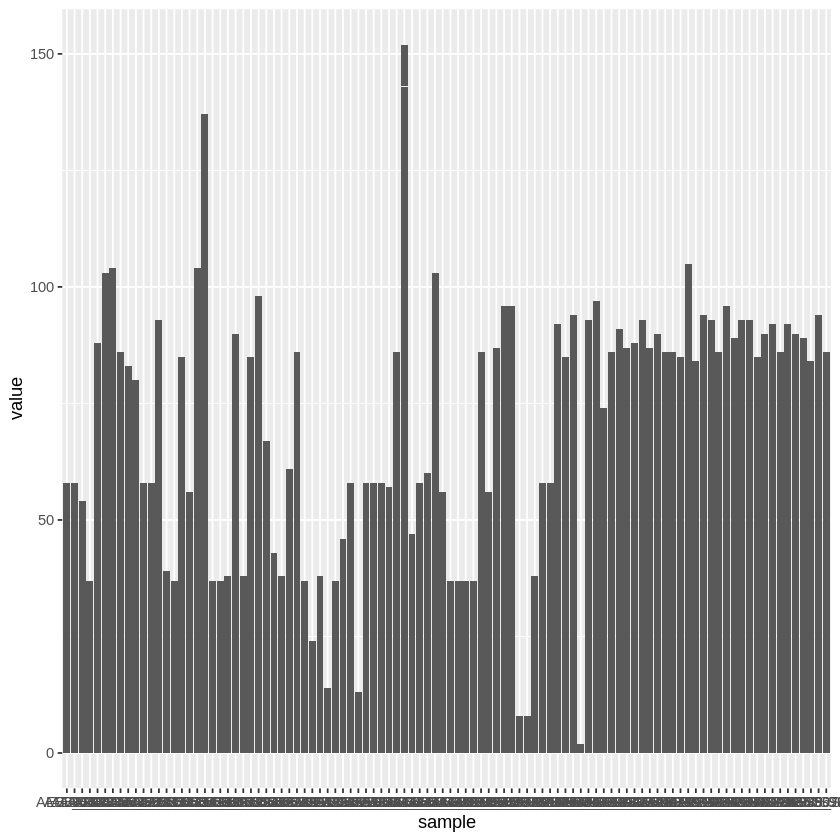

In [ ]:
ggplot(data1, aes(x = sample, y = value ), fill= gene)+
  geom_col()

### barplot value >= 2

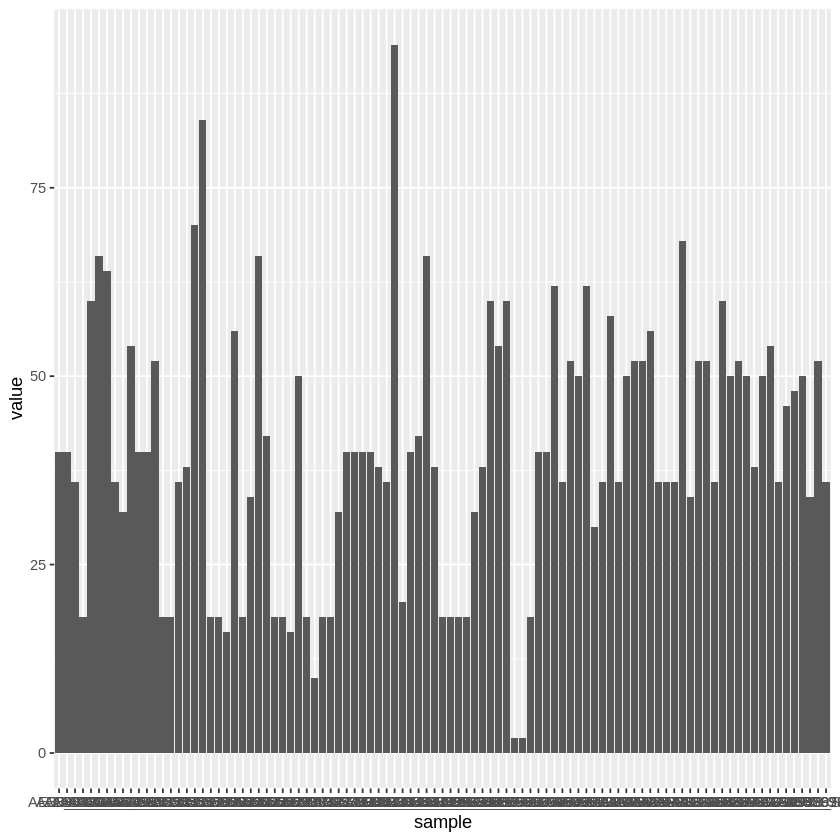

In [ ]:
ggplot(data2, aes(x = sample, y = value ), fill= gene)+
  geom_col()

## Heatmap

#### heatmap value <= 2

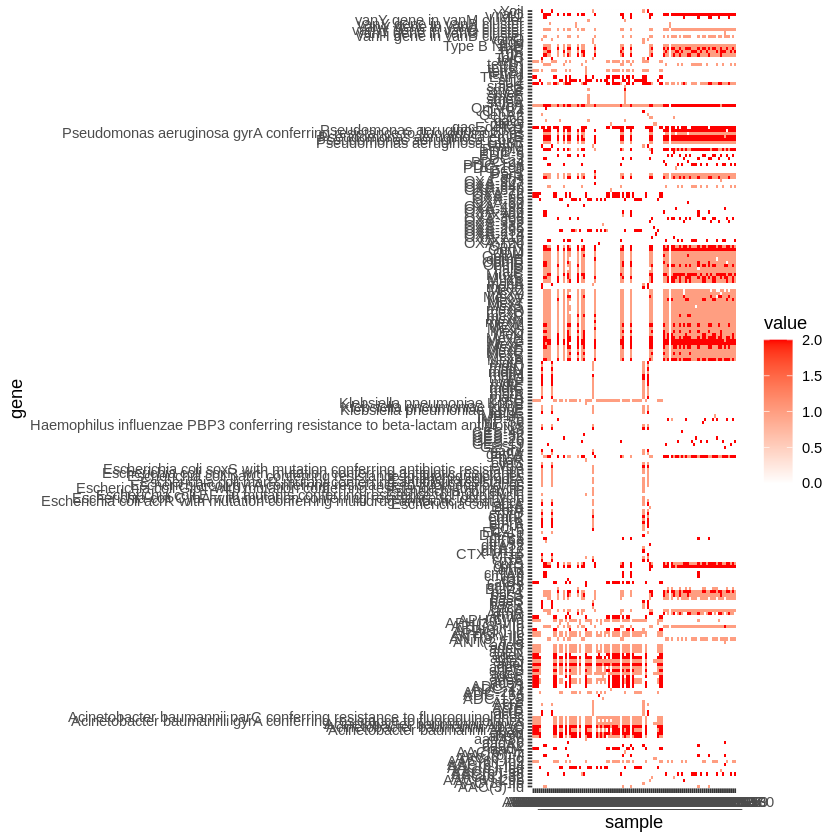

In [ ]:
ggplot(data1, aes( x = sample, y = gene, fill = value))+
  geom_tile()+
  scale_fill_gradient(low = 'white', high = 'red')

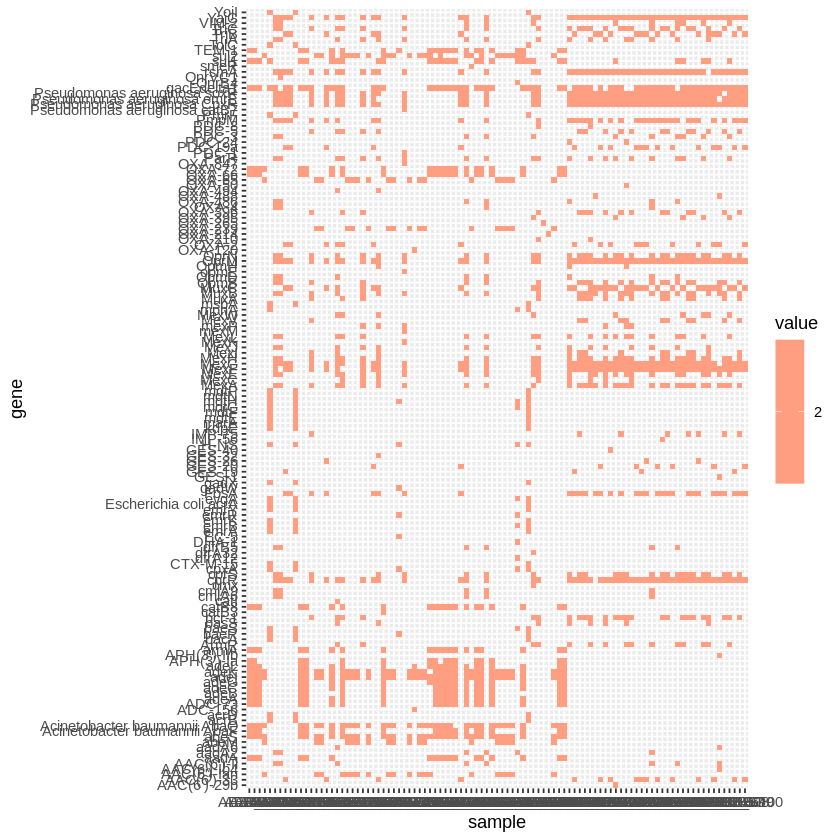

In [ ]:
ggplot(data2, aes( x = sample, y = gene, fill = value))+
  geom_tile()+
  scale_fill_gradient(low = 'white', high = 'red')